<a href="https://colab.research.google.com/github/DonRoboto/KalmanFilter_v1/blob/main/FilterKalman_1D_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
#kalman filter 1d
class Kalman_1D():

  def __init__(self, x):
    self.x_est = x
    self.x_prd = 0
    self.P = 1000
    self.z = 0
    self.K = 0
    self.fit = 1000000
  

In [3]:
def fitness(x):
  #Sphere
  #f = x**2.0

  f = 418.9829 - (x * np.sin((np.sqrt(np.abs(x) ) ) ) )
  #return f

  #Rastrigin 
  #f = 10 + (x**2 - (10*np.cos(2*np.pi*x)))
  return f



In [4]:
class Poblacion():
  p = []

  def __init__(self, n, x_min, x_max):

    for i in range(n):
      x_1 = random.uniform(x_min, x_max)
      ind = Kalman_1D(x_1)
      self.p.append(ind)

In [5]:
v_min = -500
v_max = 500
n_pob = 10

f_best = 1000000
f_true = 1000000

x_best = 1000000
x_true = 1000000

pob = Poblacion(n_pob, v_min, v_max)

for v in range(n_pob):
  print(pob.p[v].x_est)

-355.31039892920626
-345.3211629229506
-28.374934001193594
439.4439761915054
-113.24570398658307
-42.254394866343205
-415.0004567916622
-78.08735079274521
-124.21002438940599
-463.8385421732376


In [6]:

Q = 0.5
R = 0.5


for t in range(10):
   
  #evaluar el fitness de los agentes
  for f in range(n_pob):
    pob.p[f].f = fitness(pob.p[f].x_est)

  
  #actualizar x_best y x_true
  for b in range(n_pob):    
    if pob.p[b].f < f_best:
      x_best = pob.p[b].x_est
      f_best = pob.p[b].f

    if f_best<f_true:
      x_true = x_best
      f_true = f_best


  #predict (the current predicted state, is assumed to be the estimated value)
  for p in range(n_pob):
    pob.p[p].x_prd = pob.p[p].x_est
    pob.p[p].P = pob.p[p].P + Q


  #measure
  for m in range(n_pob):
    r = random.uniform(0, 1)
    pob.p[m].z = pob.p[m].x_prd + np.sin(r * 2 * np.pi) * np.abs(pob.p[m].x_prd -  x_true)

  #estimate
  for e in range(n_pob):
    pob.p[e].K = pob.p[e].P / (pob.p[e].P + R)
    pob.p[e].x_est = pob.p[e].x_prd + pob.p[e].K * (pob.p[e].z - pob.p[e].x_prd) 
    pob.p[e].P = (1 - pob.p[e].K) * pob.p[e].P

    #si sale del rango
    if np.abs(pob.p[e].x_est)>v_max:
      pob.p[e].x_est = random.uniform(v_min, v_max)
      print(pob.p[e].x_est)


print("\n")
print("x_true: {}".format(x_true))
print("f_true: {}".format(f_true))


365.1482197846476
-271.408365644991
362.62675121238783


x_true: 422.2911835286768
f_true: 0.2207804368518964


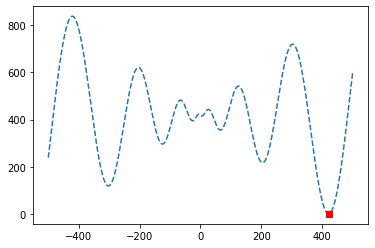

In [7]:
from numpy import arange
from scipy.optimize import minimize_scalar
from matplotlib import pyplot
 

# minimize the function
#result = minimize_scalar(fitness, method='brent')
# summarize the result

# define the range
r_min, r_max = -500, 500
# prepare inputs
inputs = arange(r_min, r_max, 0.1)
# compute targets
targets = [fitness(x) for x in inputs]
# plot inputs vs target
pyplot.plot(inputs, targets, '--')
# plot the optima
pyplot.plot([x_true], [f_true], 's', color='r')
# show the plot
pyplot.show()